In [23]:
import pandas as pd
import pymongo

# URL of the CSV file
csv_url = "https://catalog.ourworldindata.org/garden/covid/latest/compact/compact.csv" 

# Load CSV data directly from the URL into a pandas DataFrame
covid_data = pd.read_csv(csv_url)
covid_data.head()

,country,date,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,...,population,population_density,median_age,life_expectancy,gdp_per_capita,extreme_poverty,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,human_development_index
0,Afghanistan,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578846.0,62.215546,16.752,61.9824,1516.2733,NaN,10.9,48.214695,0.39,0.462
1,Afghanistan,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578846.0,62.215546,16.752,61.9824,1516.2733,NaN,10.9,48.214695,0.39,0.462
2,Afghanistan,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578846.0,62.215546,16.752,61.9824,1516.2733,NaN,10.9,48.214695,0.39,0.462
3,Afghanistan,2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578846.0,62.215546,16.752,61.9824,1516.2733,NaN,10.9,48.214695,0.39,0.462
4,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,...,40578846.0,62.215546,16.752,61.9824,1516.2733,NaN,10.9,48.214695,0.39,0.462


### Exploratory Data Analysis 

In [24]:
print(covid_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441642 entries, 0 to 441641
Data columns (total 61 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   country                                     441642 non-null  object 
 1   date                                        441642 non-null  object 
 2   total_cases                                 429000 non-null  float64
 3   new_cases                                   427186 non-null  float64
 4   new_cases_smoothed                          425960 non-null  float64
 5   total_cases_per_million                     429000 non-null  float64
 6   new_cases_per_million                       427186 non-null  float64
 7   new_cases_smoothed_per_million              425960 non-null  float64
 8   total_deaths                                429000 non-null  float64
 9   new_deaths                                  427677 non-null  float64
 

In [25]:
# Convert 'date' column to datetime type 
covid_data['date'] = pd.to_datetime(covid_data['date'])

# Check for missing values
missing_data = covid_data.isnull().sum()
print(missing_data)

country                            0
date                               0
total_cases                    12642
new_cases                      14456
new_cases_smoothed             15682
                               ...  
extreme_poverty               167690
diabetes_prevalence            69825
handwashing_facilities        241964
hospital_beds_per_thousand    175923
human_development_index       107148
Length: 61, dtype: int64


In [26]:
# Filter the rows where 'continent' is NaN
countries_with_nan_continent = covid_data[covid_data['continent'].isna()]

# Get unique countries where 'continent' is NaN
unique_countries_with_nan_continent = countries_with_nan_continent[['country']].drop_duplicates()

# Display the resulting DataFrame
unique_countries_with_nan_continent

,country
1720,Africa
20648,Asia
22364,Asia excl. China
113744,England
115103,England & Wales
123975,Europe
125691,European Union (27)
168784,High-income countries
222204,Low-income countries
223920,Lower-middle-income countries


In [27]:
covid_data_without_nan_continent = covid_data.dropna(subset=['continent'])
covid_data_without_nan_continent.head()

,country,date,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,...,population,population_density,median_age,life_expectancy,gdp_per_capita,extreme_poverty,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,human_development_index
0,Afghanistan,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578846.0,62.215546,16.752,61.9824,1516.2733,NaN,10.9,48.214695,0.39,0.462
1,Afghanistan,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578846.0,62.215546,16.752,61.9824,1516.2733,NaN,10.9,48.214695,0.39,0.462
2,Afghanistan,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578846.0,62.215546,16.752,61.9824,1516.2733,NaN,10.9,48.214695,0.39,0.462
3,Afghanistan,2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578846.0,62.215546,16.752,61.9824,1516.2733,NaN,10.9,48.214695,0.39,0.462
4,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,...,40578846.0,62.215546,16.752,61.9824,1516.2733,NaN,10.9,48.214695,0.39,0.462


In [28]:
# Get basic statistical description of the dataset
print(covid_data.describe())

# Check for unique values in important columns like country, date
print(covid_data['country'].nunique())  
print(covid_data['date'].nunique())    

# Check for duplicates
print(covid_data.duplicated().sum())

        total_cases     new_cases  new_cases_smoothed  \
count  4.290000e+05  4.271860e+05        4.259600e+05   
mean   1.245360e+07  1.268164e+04        1.271702e+04   
std    6.752093e+07  2.925742e+05        1.101137e+05   
min    0.000000e+00  0.000000e+00        0.000000e+00   
25%    6.736000e+03  0.000000e+00        0.000000e+00   
50%    6.855200e+04  0.000000e+00        1.214286e+01   
75%    9.376400e+05  0.000000e+00        3.444286e+02   
max    7.762805e+08  4.423623e+07        6.319461e+06   

       total_cases_per_million  new_cases_per_million  \
count            429000.000000          427186.000000   
mean             113826.966430             118.948044   
std              164032.183405            1482.715746   
min                   0.000000               0.000000   
25%                2110.026400               0.000000   
50%               31294.453000               0.000000   
75%              157913.450000               0.000000   
max              765540.000000

### Get data from the first case of covid for each country 

In [29]:
filtered_covid_data = covid_data_without_nan_continent[covid_data_without_nan_continent['total_cases'] > 0]

# For each country, get the row where the first case was registered
filtered_covid_data = filtered_covid_data.groupby('country', as_index=False).first()

# Display the filtered DataFrame
filtered_covid_data

,country,date,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,...,population,population_density,median_age,life_expectancy,gdp_per_capita,extreme_poverty,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,human_development_index
0,Afghanistan,2020-03-01,1.0,1.0,0.142857,0.024643,0.024643,0.003520,0.0,0.0,...,40578846.0,62.215546,16.752,61.9824,1516.2733,NaN,10.9,48.214695,0.39,0.462
1,Albania,2020-03-15,33.0,33.0,4.714286,11.670613,11.670613,1.667230,1.0,1.0,...,2827615.0,103.197624,35.943,76.4626,15492.0670,0.021277,10.2,NaN,2.89,0.789
2,Algeria,2020-03-01,1.0,1.0,0.142857,0.021989,0.021989,0.003141,0.0,0.0,...,45477391.0,19.094180,27.983,76.3767,11198.2330,0.455468,7.1,84.804100,1.90,0.745
3,American Samoa,2021-09-19,1.0,1.0,0.142857,20.676110,20.676110,2.953730,0.0,0.0,...,48365.0,241.825000,27.927,72.5398,NaN,NaN,20.3,NaN,NaN,NaN
4,Andorra,2020-03-08,1.0,1.0,0.142857,12.543589,12.543589,1.791941,0.0,0.0,...,79722.0,169.621280,42.832,80.3684,NaN,NaN,9.7,NaN,NaN,0.884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,Vietnam,2020-01-26,2.0,2.0,0.285714,0.020064,0.020064,0.002866,0.0,0.0,...,99680656.0,318.032650,31.938,73.6181,11396.5310,0.963795,6.1,88.711780,2.60,0.726
228,Wallis and Futuna,2020-10-25,1.0,1.0,0.142857,86.948960,86.948960,12.421280,0.0,0.0,...,11501.0,82.150000,36.599,78.4396,NaN,NaN,NaN,NaN,NaN,NaN
229,Yemen,2020-04-12,1.0,1.0,0.142857,0.026162,0.026162,0.003737,0.0,0.0,...,38222880.0,72.395935,18.118,63.7534,NaN,19.802757,5.4,48.612970,0.71,0.424
230,Zambia,2020-03-22,2.0,2.0,0.285714,0.099241,0.099241,0.014177,0.0,0.0,...,20152934.0,27.109505,17.288,61.2234,3365.8738,64.349754,11.9,18.154615,NaN,0.569


### Which countries registered the first covid case ?

In [30]:
#Group by country and get the first date where total cases were registered
first_case_by_country = filtered_covid_data.groupby('country').apply(lambda x: x.loc[x['date'].idxmin()])

# Sort by date to see which countries registered cases first
first_case_by_country_sorted = first_case_by_country.sort_values('date').reset_index(drop=True)

# Extract the top 5 and the last 5 countries
top_5 = first_case_by_country_sorted.head(12)
last_5 = first_case_by_country_sorted.tail(12)

# Concatenate top 12 and last 12
top_and_last_5 = pd.concat([top_5, last_5])

# Select only relevant columns (country, date, total_cases)
result = top_and_last_5[['country', 'continent','date', 'total_cases']]
result

,country,continent,date,total_cases
0,China,Asia,2020-01-05,1.0
1,Germany,Europe,2020-01-05,1.0
2,Monaco,Europe,2020-01-12,1.0
3,Thailand,Asia,2020-01-19,6.0
4,Spain,Europe,2020-01-19,2.0
5,South Korea,Asia,2020-01-19,1.0
6,Japan,Asia,2020-01-19,1.0
7,Vietnam,Asia,2020-01-26,2.0
8,United States,North America,2020-01-26,7.0
9,Malaysia,Asia,2020-01-26,4.0


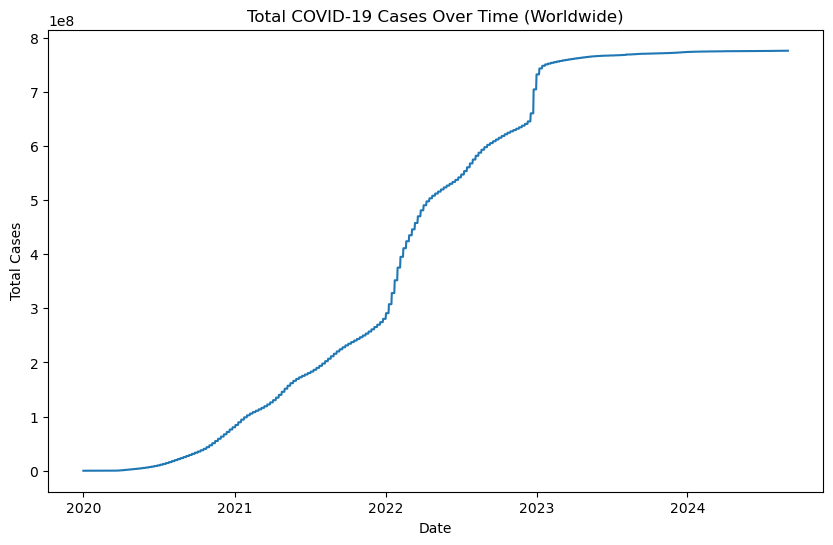

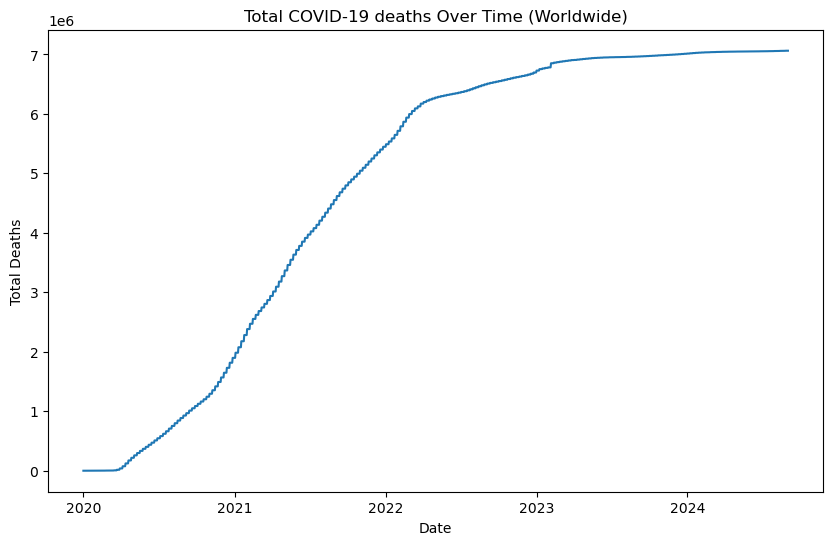

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate total cases by date for all countries combined
cases_over_time = covid_data_without_nan_continent.groupby('date')['total_cases'].sum().reset_index()

# Filter to include only dates up to August 31, 2024
cutoff_date = '2024-08-31'
cases_over_time_filtered = cases_over_time[cases_over_time['date'] <= cutoff_date]


# Plot total cases over time
plt.figure(figsize=(10,6))
sns.lineplot(x='date', y='total_cases', data=cases_over_time_filtered)
plt.title("Total COVID-19 Cases Over Time (Worldwide)")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.show()

# Aggregate total cases by date for all countries combined
deaths_over_time = covid_data_without_nan_continent.groupby('date')['total_deaths'].sum().reset_index()
deaths_over_time_filtered = deaths_over_time[cases_over_time['date'] <= cutoff_date]

# Plot total cases over time
plt.figure(figsize=(10,6))
sns.lineplot(x='date', y='total_deaths', data= deaths_over_time_filtered)
plt.title("Total COVID-19 deaths Over Time (Worldwide)")
plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.show()

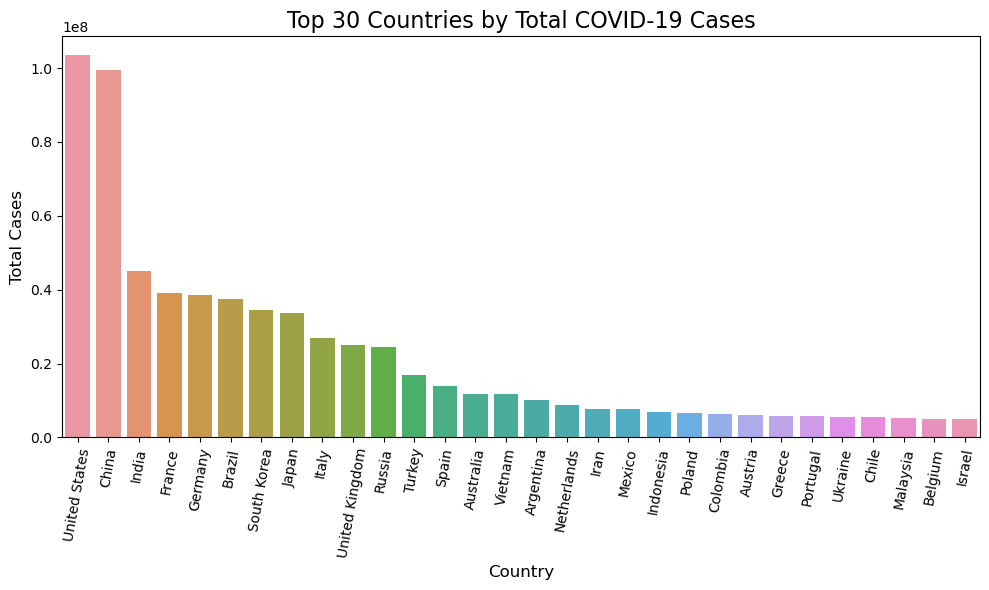

In [32]:
# Get top 30 countries by overall total cases
top_countries_cases = covid_data_without_nan_continent.groupby('country')['total_cases'].max().sort_values(ascending=False).head(30)

# Plot bar plot for total cases per country for the top 10 countries
plt.figure(figsize=(10,6))
sns.barplot(x=top_countries_cases.index, y=top_countries_cases.values)

# Add title and labels
plt.title("Top 30 Countries by Total COVID-19 Cases", fontsize=16)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Total Cases", fontsize=12)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=80)

# Show the plot
plt.tight_layout()
plt.show()

In [33]:
top_countries_cases

country
United States     103436829.0
China              99380194.0
India              45043227.0
France             38997490.0
Germany            38437756.0
Brazil             37511921.0
South Korea        34571873.0
Japan              33803572.0
Italy              26826486.0
United Kingdom     24987768.0
Russia             24387868.0
Turkey             17004724.0
Spain              13980340.0
Australia          11861161.0
Vietnam            11624000.0
Argentina          10102458.0
Netherlands         8642005.0
Iran                7627863.0
Mexico              7621947.0
Indonesia           6829576.0
Poland              6714671.0
Colombia            6393917.0
Austria             6082540.0
Greece              5701661.0
Portugal            5667626.0
Ukraine             5539595.0
Chile               5402051.0
Malaysia            5312619.0
Belgium             4879661.0
Israel              4841558.0
Name: total_cases, dtype: float64

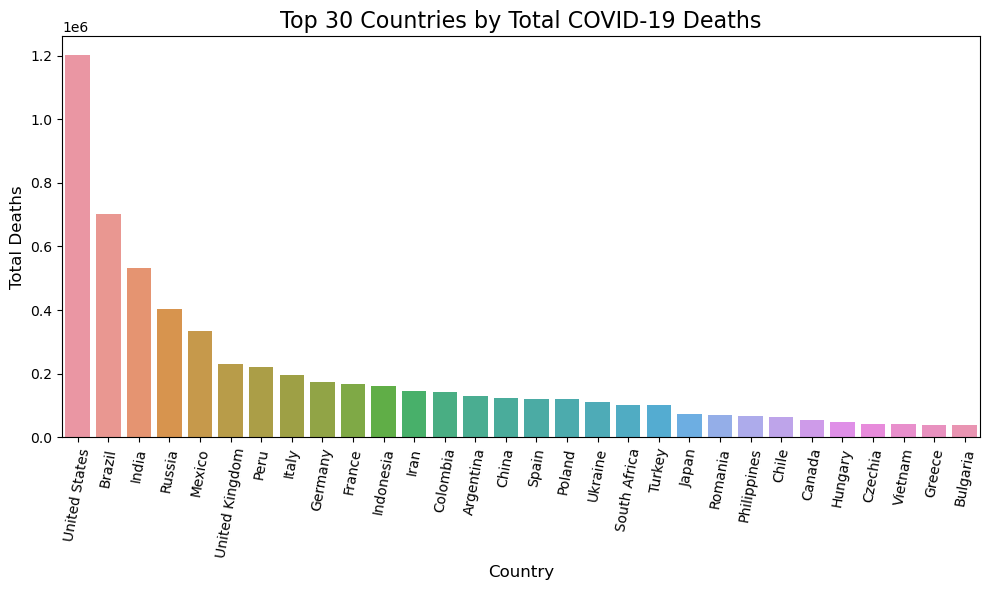

In [34]:
# Get top 30 countries by overall total cases
top_countries_deaths = covid_data_without_nan_continent.groupby('country')['total_deaths'].max().sort_values(ascending=False).head(30)

# Plot bar plot for total cases per country for the top 10 countries
plt.figure(figsize=(10,6))
sns.barplot(x=top_countries_deaths.index, y=top_countries_deaths.values)

# Add title and labels
plt.title("Top 30 Countries by Total COVID-19 Deaths", fontsize=16)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Total Deaths", fontsize=12)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=80)

# Show the plot
plt.tight_layout()
plt.show()

In [35]:
top_countries_deaths

country
United States     1200360.0
Brazil             702116.0
India              533638.0
Russia             403325.0
Mexico             334714.0
United Kingdom     232112.0
Peru               220975.0
Italy              197542.0
Germany            174979.0
France             168091.0
Indonesia          162059.0
Iran               146837.0
Colombia           142727.0
Argentina          130673.0
China              122352.0
Spain              121852.0
Poland             120809.0
Ukraine            109923.0
South Africa       102595.0
Turkey             101419.0
Japan               74694.0
Romania             68899.0
Philippines         66864.0
Chile               64482.0
Canada              55282.0
Hungary             49065.0
Czechia             43541.0
Vietnam             43206.0
Greece              39478.0
Bulgaria            38718.0
Name: total_deaths, dtype: float64

### Niger covid Analysis 

In [36]:
country_name = "Niger"

niger_covid_data = covid_data[covid_data['country'] == country_name]

# Display the DataFrame for the specific country
print(f"Data for {country_name}:")
niger_covid_data.head()

Data for Niger:


,country,date,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,...,population,population_density,median_age,life_expectancy,gdp_per_capita,extreme_poverty,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,human_development_index
276856,Niger,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25311977.0,19.982615,15.102,61.5763,1274.6417,50.613815,5.2,24.616806,0.39,0.394
276857,Niger,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25311977.0,19.982615,15.102,61.5763,1274.6417,50.613815,5.2,24.616806,0.39,0.394
276858,Niger,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25311977.0,19.982615,15.102,61.5763,1274.6417,50.613815,5.2,24.616806,0.39,0.394
276859,Niger,2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25311977.0,19.982615,15.102,61.5763,1274.6417,50.613815,5.2,24.616806,0.39,0.394
276860,Niger,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,...,25311977.0,19.982615,15.102,61.5763,1274.6417,50.613815,5.2,24.616806,0.39,0.394


In [37]:
# Statistical summary of numerical columns for Niger data
niger_stats = niger_covid_data.describe()

# Display the summary
print("Statistical summary of Niger data:")
print(niger_stats)

Statistical summary of Niger data:
       total_cases    new_cases  new_cases_smoothed  total_cases_per_million  \
count  1716.000000  1716.000000         1711.000000              1716.000000   
mean   6744.656760     5.549534            5.564248               266.461081   
std    3429.274831    34.587185           12.034589               135.480324   
min       0.000000     0.000000            0.000000                 0.000000   
25%    4822.000000     0.000000            0.000000               190.502700   
50%    8986.000000     0.000000            1.000000               355.009800   
75%    9515.000000     0.000000            5.571429               375.909000   
max    9523.000000   523.000000           74.714290               376.225070   

       new_cases_per_million  new_cases_smoothed_per_million  total_deaths  \
count            1716.000000                     1711.000000   1716.000000   
mean                0.219245                        0.219827    235.487179   
std       

In [38]:
st_case_registered_niger = filtered_covid_data[filtered_covid_data['country'] == country_name]
st_case_registered_niger

,country,date,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,...,population,population_density,median_age,life_expectancy,gdp_per_capita,extreme_poverty,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,human_development_index
150,Niger,2020-03-22,2.0,2.0,0.285714,0.079014,0.079014,0.011288,0.0,0.0,...,25311977.0,19.982615,15.102,61.5763,1274.6417,50.613815,5.2,24.616806,0.39,0.394


### The first case of covid19 was registered on March 22nd 2020 in Niger. The total case on that day was 2 cases. 

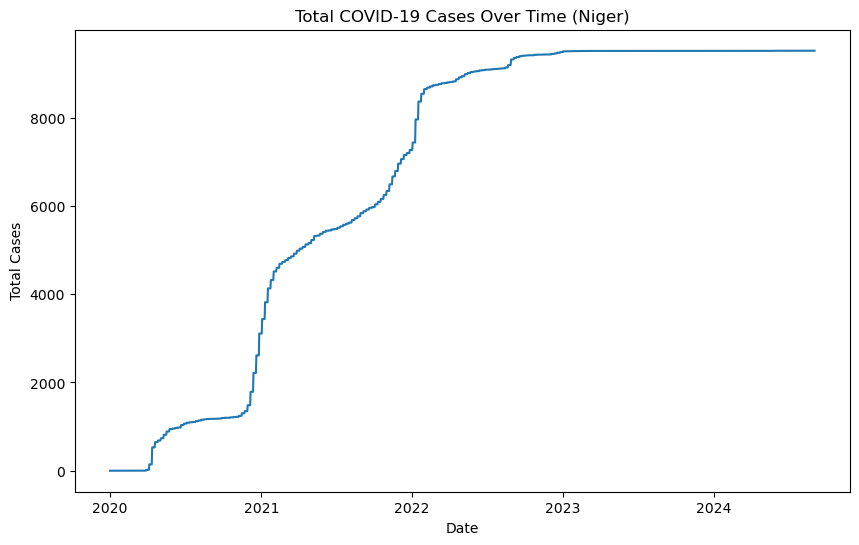

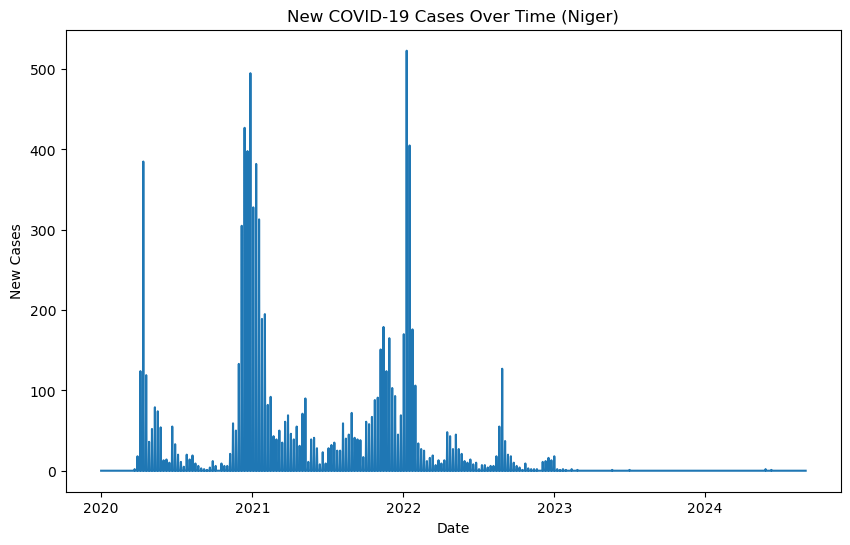

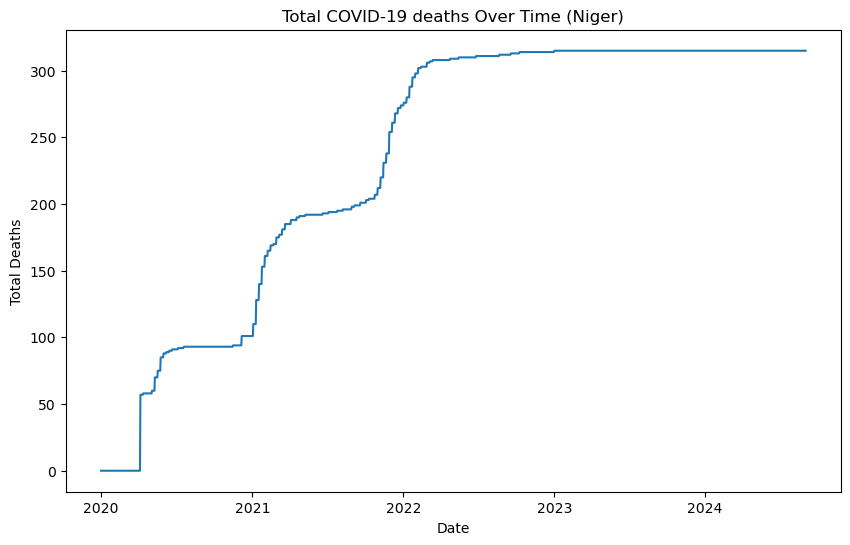

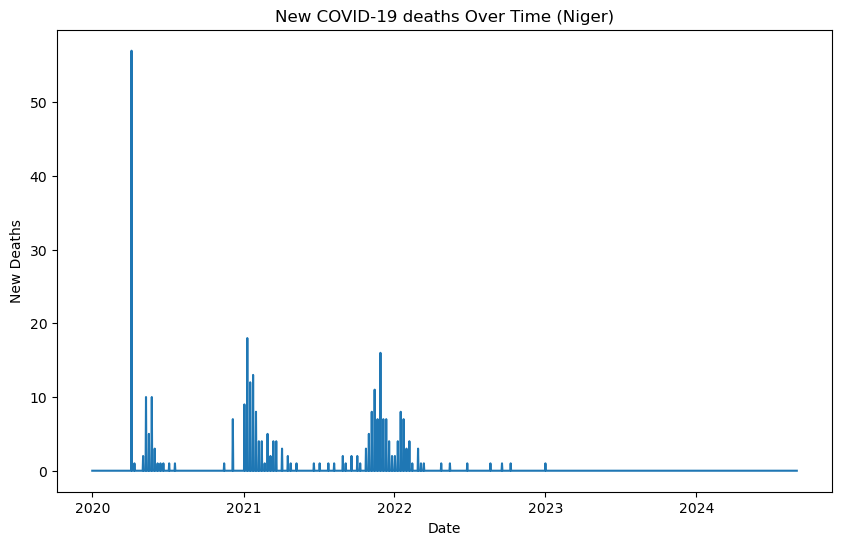

In [39]:
# Aggregate total cases by date for all countries combined
cases_over_time_niger = niger_covid_data.groupby('date')['total_cases'].sum().reset_index()

# Filter to include only dates up to August 31, 2024
cutoff_date = '2024-08-31'
cases_over_time_filtered_niger = cases_over_time_niger[cases_over_time_niger['date'] <= cutoff_date]


# Plot total cases over time
plt.figure(figsize=(10,6))
sns.lineplot(x='date', y='total_cases', data=cases_over_time_filtered_niger)
plt.title("Total COVID-19 Cases Over Time (Niger)")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.show()


new_cases_over_time_niger = niger_covid_data.groupby('date')['new_cases'].sum().reset_index()
# Filter to include only dates up to August 31, 2024
cutoff_date = '2024-08-31'
new_cases_over_time_filtered_niger = new_cases_over_time_niger[new_cases_over_time_niger['date'] <= cutoff_date]
# Plot total cases over time
plt.figure(figsize=(10,6))
sns.lineplot(x='date', y='new_cases', data=new_cases_over_time_filtered_niger)
plt.title("New COVID-19 Cases Over Time (Niger)")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.show()


# Aggregate total cases by date for all countries combined
deaths_over_time_niger = niger_covid_data.groupby('date')['total_deaths'].sum().reset_index()
deaths_over_time_filtered_niger = deaths_over_time_niger[deaths_over_time_niger['date'] <= cutoff_date]

# Plot total cases over time
plt.figure(figsize=(10,6))
sns.lineplot(x='date', y='total_deaths', data= deaths_over_time_filtered_niger)
plt.title("Total COVID-19 deaths Over Time (Niger)")
plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.show()


# Aggregate total cases by date for all countries combined
new_deaths_over_time_niger = niger_covid_data.groupby('date')['new_deaths'].sum().reset_index()
new_deaths_over_time_filtered_niger = new_deaths_over_time_niger[new_deaths_over_time_niger['date'] <= cutoff_date]

# Plot total cases over time
plt.figure(figsize=(10,6))
sns.lineplot(x='date', y='new_deaths', data= new_deaths_over_time_filtered_niger)
plt.title("New COVID-19 deaths Over Time (Niger)")
plt.xlabel("Date")
plt.ylabel("New Deaths")
plt.show()

In [40]:
# Drop columns that have a high percentage of missing values (threshold set to 40%)
threshold = 0.4 * len(niger_covid_data)
niger_data_cleaned = niger_covid_data.dropna(thresh=threshold, axis=1)

# Fill remaining missing values with the mean (for numeric columns)
niger_data_cleaned.fillna(niger_data_cleaned.mean(), inplace=True)

# Confirm that missing values have been handled
print(niger_data_cleaned.isna().sum())

country                                       0
date                                          0
total_cases                                   0
new_cases                                     0
new_cases_smoothed                            0
total_cases_per_million                       0
new_cases_per_million                         0
new_cases_smoothed_per_million                0
total_deaths                                  0
new_deaths                                    0
new_deaths_smoothed                           0
total_deaths_per_million                      0
new_deaths_per_million                        0
new_deaths_smoothed_per_million               0
stringency_index                              0
reproduction_rate                             0
new_vaccinations_smoothed                     0
new_vaccinations_smoothed_per_million         0
new_people_vaccinated_smoothed                0
new_people_vaccinated_smoothed_per_hundred    0
code                                    

/var/folders/dr/js5nvmg90d37xtyx33clr3th0000gn/T/ipykernel_7440/3180618149.py:6: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  niger_data_cleaned.fillna(niger_data_cleaned.mean(), inplace=True)
/var/folders/dr/js5nvmg90d37xtyx33clr3th0000gn/T/ipykernel_7440/3180618149.py:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  niger_data_cleaned.fillna(niger_data_cleaned.mean(), inplace=True)
/var/folders/dr/js5nvmg90d37xtyx33clr3th0000gn/T/ipykernel_7440/3180618149.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

### Features selection 

In [41]:
# Check for any non-numeric columns
non_numeric_columns = niger_data_cleaned.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)


Non-numeric columns: Index(['country', 'code', 'continent'], dtype='object')


In [42]:
# Drop columns that are non-numeric and not relevant for model training, e.g., 'date', 'country'
niger_data_cleaned = niger_data_cleaned.drop(columns=['date','code', 'country', 'continent'])


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Check for remaining categorical columns and encode them
niger_data_encoded = pd.get_dummies(niger_data_cleaned, drop_first=True)

# Check the result to ensure everything is now numeric
print(niger_data_encoded.dtypes)

# Now split the data again
X = niger_data_encoded.drop(columns=['total_cases'])
y = niger_data_encoded['total_cases']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


total_cases                                   float64
new_cases                                     float64
new_cases_smoothed                            float64
total_cases_per_million                       float64
new_cases_per_million                         float64
new_cases_smoothed_per_million                float64
total_deaths                                  float64
new_deaths                                    float64
new_deaths_smoothed                           float64
total_deaths_per_million                      float64
new_deaths_per_million                        float64
new_deaths_smoothed_per_million               float64
stringency_index                              float64
reproduction_rate                             float64
new_vaccinations_smoothed                     float64
new_vaccinations_smoothed_per_million         float64
new_people_vaccinated_smoothed                float64
new_people_vaccinated_smoothed_per_hundred    float64
population                  

In [44]:
# Fit RandomForest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame with feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top features
print("Feature importance from Random Forest:")
print(feature_importance_df.head(10))

Feature importance from Random Forest:
                                       Feature  Importance
2                      total_cases_per_million    0.567992
8                     total_deaths_per_million    0.230363
5                                 total_deaths    0.200241
1                           new_cases_smoothed    0.000542
4               new_cases_smoothed_per_million    0.000510
12                           reproduction_rate    0.000129
10             new_deaths_smoothed_per_million    0.000060
7                          new_deaths_smoothed    0.000054
16  new_people_vaccinated_smoothed_per_hundred    0.000032
15              new_people_vaccinated_smoothed    0.000026
